# KEYWORDS EXTRACTION WITH DIFFERENT TECHNIQUES

The aim of this work is to try three different classical techniques in order to extract keywords. After that, we are going to use a BERT approach and compare the results that were obtained.

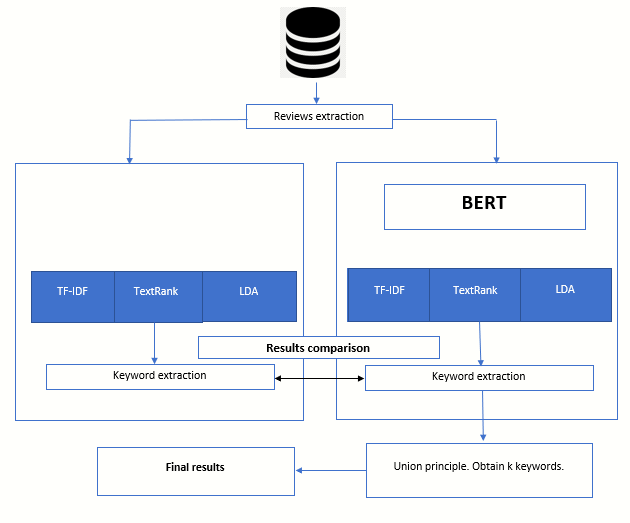

In [3]:
#import data
from google.colab import files
uploaded = files.upload()

Saving Starbucks.txt to Starbucks.txt


<a name="index"></a>
# Index

[1.Sentence extraction from reviews](#sentenceExtraction)

[2.TF-IDF](#TF-IDF)

[3.TextRank](#TextRank)

<a name="sentenceExtraction"></a>
# 1. Sentence extraction from reviews


We are going to prove our approach with a bunch of reviews which belongs to important business. Such as MacDonalds, Starbucks and CVS Pharmacy

The first step is simple: storage all theh reviews on different lists.

In [4]:
CVS_Pharmacy_Reviews = []
CVS_Pharmacy_Sentences_len =[]

file1 = open('CVS_Pharmacy.txt', 'r')
Lines = file1.readlines()

for line in Lines:
  CVS_Pharmacy_Reviews.append(line.strip())

In [5]:
CVS_Pharmacy_Sentences = []
for r in CVS_Pharmacy_Reviews:
  aux = r.split(".")
  for sentence in aux:
    if(len(sentence)>1):
      CVS_Pharmacy_Sentences.append(sentence)
      CVS_Pharmacy_Sentences_len.append(len(sentence))

In [6]:
McDonalds_Reviews = []
McDonalds_Sentences_len=[]

file1 = open('McDonalds.txt', 'r')
Lines = file1.readlines()

for line in Lines:
  McDonalds_Reviews.append(line.strip())

In [7]:
McDonalds_Sentences = []
for r in McDonalds_Reviews:
  aux = r.split(".")
  for sentence in aux:
    if(len(sentence)>1):
      McDonalds_Sentences.append(sentence)
      McDonalds_Sentences_len.append(len(sentence))

In [8]:
Starbucks_Reviews = []
Starbucks_Sentences_len=[]

file1 = open('Starbucks.txt', 'r')
Lines = file1.readlines()

for line in Lines:
  Starbucks_Reviews.append(line.strip())

In [9]:
Starbucks_Sentences = []
for r in Starbucks_Reviews:
  aux = r.split(".")
  for sentence in aux:
    if(len(sentence)>1):
      Starbucks_Sentences.append(sentence)
      Starbucks_Sentences_len.append(len(sentence))

After that, the second step is the following: study the most commont length of the senntences -from the reviews-, and delete the outliers -based on the lenght-. 

In [10]:
#Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

*1.1 CSV Pharmacy*

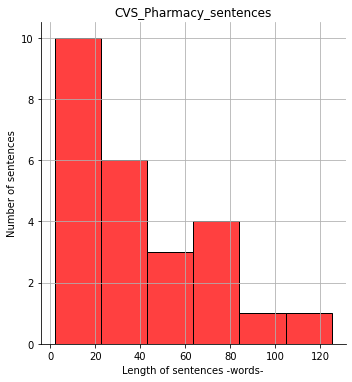

In [11]:
sns.displot(CVS_Pharmacy_Sentences_len,color='red')
plt.title('CVS_Pharmacy_sentences')
plt.xlabel('Length of sentences -words-')
plt.ylabel('Number of sentences')
plt.grid()

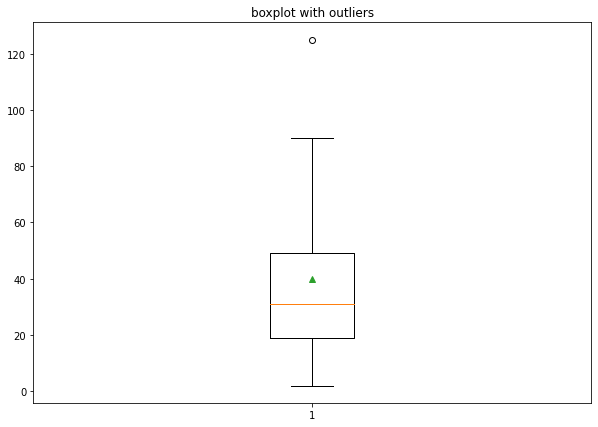

In [12]:
#BoxPlot
fig = plt.figure(figsize =(10, 7))
# Creating plot
bp = plt.boxplot(CVS_Pharmacy_Sentences_len,showmeans=True) 
# show plot
plt.title("boxplot with outliers")
plt.show()

In [13]:
medians = [round(item.get_ydata()[0], 1) for item in bp['medians']]
means = [round(item.get_ydata()[0], 1) for item in bp['means']]
print(f'Medians: {medians}\n'
      f'Means:   {means}')

Medians: [31.0]
Means:   [39.8]


In [14]:
q1_CSV_Pharmacy = [round(min(item.get_ydata()), 1) for item in bp['boxes']]
q3_CSV_Pharmacy= [round(max(item.get_ydata()), 1) for item in bp['boxes']]
print(f'Q1: {q1_CSV_Pharmacy}\n'
      f'Q3: {q3_CSV_Pharmacy}')

Q1: [19.0]
Q3: [49.0]


In [ ]:
#CVS_Pharmacy_Sentences

In [15]:
FilterReviewsCVSPharmacy = []
totalFilterSentecesCVSPharmacy = 0

for r in CVS_Pharmacy_Reviews:
  SReview=[]
  aux = r.split(".")
  for sentence in aux:
    if(len(sentence)>q1_CSV_Pharmacy[0]):
      totalFilterSentecesCVSPharmacy+=1
      SReview.append(sentence.lower())
  FilterReviewsCVSPharmacy.append(SReview)

print(f"The total of filter sentences are {totalFilterSentecesCVSPharmacy}")

The total of filter sentences are 18


In [ ]:
#FilterReviewsCVSPharmacy

*1.2 McDonalds*

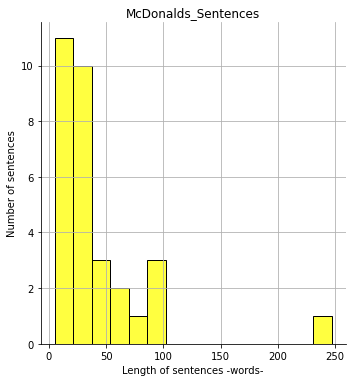

In [16]:
sns.displot(McDonalds_Sentences_len,color='yellow')
plt.title('McDonalds_Sentences')
plt.xlabel('Length of sentences -words-')
plt.ylabel('Number of sentences')
plt.grid()

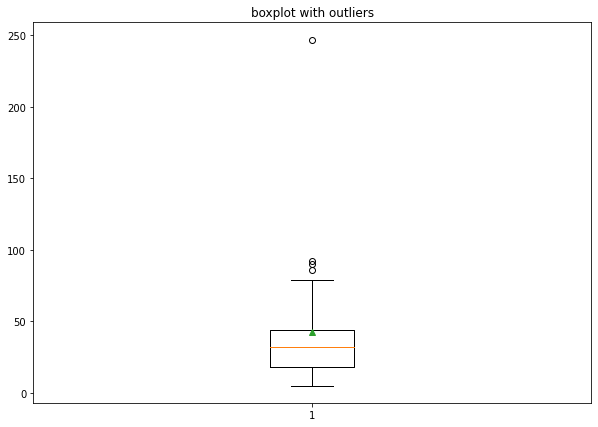

In [17]:
#BoxPlot
fig = plt.figure(figsize =(10, 7))
# Creating plot
bp = plt.boxplot(McDonalds_Sentences_len,showmeans=True) 
# show plot
plt.title("boxplot with outliers")
plt.show()

In [18]:
medians = [round(item.get_ydata()[0], 1) for item in bp['medians']]
means = [round(item.get_ydata()[0], 1) for item in bp['means']]
print(f'Medians: {medians}\n'
      f'Means:   {means}')

Medians: [32.0]
Means:   [42.1]


In [19]:
q1_McDonalds = [round(min(item.get_ydata()), 1) for item in bp['boxes']]
q3_McDonalds= [round(max(item.get_ydata()), 1) for item in bp['boxes']]
print(f'Q1: {q1_McDonalds}\n'
      f'Q3: {q3_McDonalds}')

Q1: [18.0]
Q3: [43.5]


In [20]:
FilterReviewsMcDonalds = []
totalFilterSentecesMcDonalds = 0

for r in McDonalds_Reviews:
  SReview=[]
  aux = r.split(".")
  for sentence in aux:
    if(len(sentence)>q1_McDonalds[0]):
      totalFilterSentecesMcDonalds+=1
      SReview.append(sentence.lower())
  FilterReviewsMcDonalds.append(SReview)

print(f"The total of filter sentences are {totalFilterSentecesMcDonalds}")

The total of filter sentences are 21


*1.3 Starbucks*

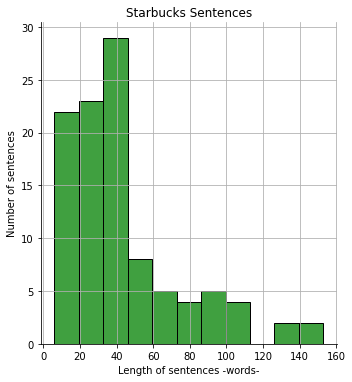

In [21]:
sns.displot(Starbucks_Sentences_len,color='green')
plt.title('Starbucks Sentences')
plt.xlabel('Length of sentences -words-')
plt.ylabel('Number of sentences')
plt.grid()

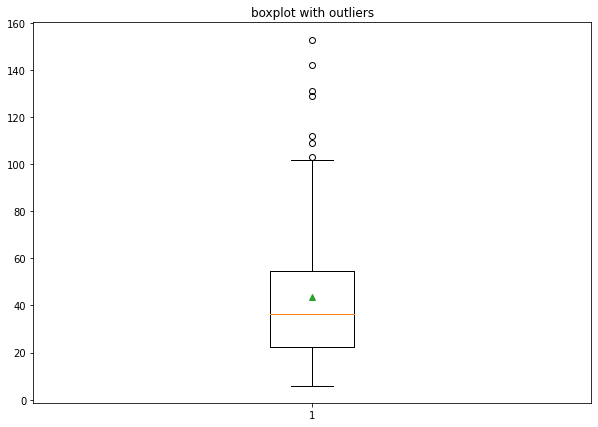

In [22]:
#BoxPlot
fig = plt.figure(figsize =(10, 7))
# Creating plot
bp = plt.boxplot(Starbucks_Sentences_len,showmeans=True) 
# show plot
plt.title("boxplot with outliers")
plt.show()

In [23]:
medians = [round(item.get_ydata()[0], 1) for item in bp['medians']]
means = [round(item.get_ydata()[0], 1) for item in bp['means']]
print(f'Medians: {medians}\n'
      f'Means:   {means}')

Medians: [36.5]
Means:   [43.8]


In [24]:
q1_Starbucks = [round(min(item.get_ydata()), 1) for item in bp['boxes']]
q3_Starbucks= [round(max(item.get_ydata()), 1) for item in bp['boxes']]
print(f'Q1: {q1_Starbucks}\n'
      f'Q3: {q3_Starbucks}')

Q1: [22.5]
Q3: [54.5]


In [25]:
FilterReviewsStarBucks = []
totalFilterSentecesStarBucks = 0

for r in Starbucks_Reviews:
  SReview=[]
  aux = r.split(".")
  for sentence in aux:
    if(len(sentence)>q1_Starbucks[0]):
      totalFilterSentecesStarBucks+=1
      SReview.append(sentence.lower())
  FilterReviewsStarBucks.append(SReview)

print(f"The total of filter sentences are {totalFilterSentecesStarBucks}")

The total of filter sentences are 78


[**Return to index**](#index)

<a name="TF-IDF"></a>
# 2. TF-IDF

*2.1 TF-IDF application*

In information retrieval, tf–idf (also TF*IDF, TFIDF, TF–IDF, or Tf–idf), short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

In our particular case, the corpus is a mix of reviews that have been made by some clients.

In [26]:
import pandas as pd
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer 

In [27]:
#Import stopwords is a must
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
#We are going to use this link, because it has a really big collection of stopwords.
import requests
stopwords_list = requests.get("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").content
stop_words = set(stopwords_list.decode().splitlines()) 

An interesting approach is to add custom stopwords based on the business.

In [29]:
stop_words.add('starbucks')
#stop_words.add('csv pharmacy')
#stop_words.add('csv')
#stop_words.add('McDonalds')
#stop_words.add("McDonald's")

In [30]:
print('starbucks' in stop_words)
#print('csv pharmacy' in stop_words)
#print('csv' in stop_words)
#print('McDonalds' in stop_words)
#print("McDonald's" in stop_words)

True


In [31]:
'''
  Here you can change the business
'''
totalReviewsIDF = FilterReviewsStarBucks

In [32]:
'''
  Input: bunch of reviews
  Ouput: Not empty reviews
'''
def removeEmptyReviews(dataset):
  dataset = [x for x in dataset if x]
  return dataset

In [33]:
FiltertotalReviewsIDF = removeEmptyReviews(totalReviewsIDF)

Is is a must to define a preprocessing stage...

In [34]:
'''
 Input: string
 Output: preprocessed string
'''
def preprocessing(sentence):
    sentence = toLowerCase(sentence)
    sentence = removePunctuation(sentence)
    sentence = removeApostrophe(sentence)
    sentence = removeCharactersLengthOne(sentence)
    sentence = numberConvert(sentence)
    sentence = removeStopWords(sentence)
    #is it possible to use stemming
    sentence = lemmatization(sentence)
    sentence = removePunctuation(sentence)
    return sentence

In [35]:
pip install num2words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 101 kB 4.6 MB/s 


In [36]:
from num2words import num2words

In [37]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [38]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [39]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [40]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [41]:
'''
 Input: string with numeric values
 Output: string without numeric values
'''
def numberConvert(sentence):
  sentence = str(sentence)
  filter = []
  word_tokens = word_tokenize(sentence)
  for  w in word_tokens:
    if(w.isnumeric()):
      filter.append(num2words(w))
    else:
      filter.append(w)
  filter = " ".join(filter)
  return str(filter)


'''
 Input: string 
 Output: string in lowercase
'''
def toLowerCase(sentence):
  return sentence.lower()


'''
 Input: string 
 Output: string without punctuation
'''
def removePunctuation(sentence):
  symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
  for i in symbols:
    sentence = np.char.replace(sentence, i, ' ')  
  return sentence


'''
 Input: string 
 Output: string without apostrophe
'''
def removeApostrophe(sentence):
  return np.char.replace(sentence, "'", "")


'''
Input: string
Output: string without 1 char length character
'''
def removeCharactersLengthOne(sentence):
  sentence = str(sentence)
  filter = ""
  word_tokens = word_tokenize(sentence)
  flag = 0
  for w in word_tokens:
    if flag ==0:
       filter = filter + w
       flag =1
    if len(w) > 1:
      filter = filter + " " + w
  return str(filter)


'''
Input: string
Output: stemming(string)
'''
def Stemming(sentence):
  word_tokens = word_tokenize(sentence)
  s_filter = []
  for w in word_tokens:
    s_filter.append(ps.stem(w))
  s_filter = " ".join(s_filter)
  return str(s_filter)

'''
Input: string
Output: lemmatization(string)
'''
def lemmatization(sentence):
  word_tokens = word_tokenize(sentence)
  s_filter = []
  for w in word_tokens:
    s_filter.append(lemmatizer.lemmatize(w))
  s_filter = " ".join(s_filter)
  return str(s_filter)


'''
Input: string
Output: string without stopwords
'''
def removeStopWords(sentence):
  word_tokens = word_tokenize(sentence)
  s_filter = [w for w in word_tokens if not w.lower() in stop_words]
  s_filter = " ".join(s_filter)
  return str(s_filter)

In [42]:
for i in range(len(FiltertotalReviewsIDF)):
  for s in range(len(FiltertotalReviewsIDF[i])):
    preprocessed_sentence = preprocessing(FiltertotalReviewsIDF[i][s])
    FiltertotalReviewsIDF[i][s]=str(preprocessed_sentence)

In [43]:
FiltertotalReviewsIDF = removeEmptyReviews(FiltertotalReviewsIDF)

In [44]:
Corpus = [" ".join(x) for x in FiltertotalReviewsIDF]

In [45]:
print(f"The number of filter sentences is the following: {len(Corpus)}") 

The number of filter sentences is the following: 44


Some results are the followings:


*   Starbucks filter sentences: 44
*   McDonalds filter sentences: ?
*   CSV Pharmacy filter sentences: ? 



In [46]:
%%time
vectorizer_TFIDF = TfidfVectorizer()
vectors_TFIDF = vectorizer_TFIDF.fit_transform(Corpus)
feature_names = vectorizer_TFIDF.get_feature_names_out()
dense = vectors_TFIDF.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

CPU times: user 11.3 ms, sys: 1.04 ms, total: 12.3 ms
Wall time: 24.5 ms


In [ ]:
print(f"The number of sentences is {df.shape[0]}")
print(f"The number of different words is {df.shape[1]}")

The number of sentences is 44
The number of different words is 212


*2.2 Word distribution*

In [47]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

In order to watch the word distribution , dimensionallity reduction is a must. To achive that, PCA will be used.

PCA is used in exploratory data analysis and for making predictive models. It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible. The first principal component can equivalently be defined as a direction that maximizes the variance of the projected data. The i-th principal component can be taken as a direction orthogonal to the first i-1 principal components that maximizes the variance of the projected data.

In [ ]:
X = vectorizer_TFIDF.fit_transform(Corpus).toarray() #todense
print(X.shape) 

(44, 212)


In [ ]:
pca = PCA(n_components =2).fit(X)
print(pca.components_.shape)

(2, 212)


In [ ]:
data2D = pca.transform(X)
print(data2D.shape)

(44, 2)


In [ ]:
'''
  INPUT: PCA data reduction, max number of clusters
  OUTPUT: best number of clusters
'''
def find_optimal_clusters_silhoutte(data, max_k):
  bestNumberOfClusters=0
  previousValues=0.0
  
  for n_clusters in range(2,max_k+1):
    km = KMeans(n_clusters,init='k-means++',max_iter =100,random_state=1)
   
    km.fit(data)
    silhoutte_avg = silhouette_score(data, km.labels_,sample_size=1000)
  
    if(silhoutte_avg > previousValues ):
      bestNumberOfClusters = n_clusters
      previousValues = silhoutte_avg

  print(f"Numero de clusters elegido: {bestNumberOfClusters}")
  print(f"Silhoutte score: {previousValues}")
  
  return bestNumberOfClusters

In [ ]:
bestNumberOfClusters = find_optimal_clusters_silhoutte(data2D, 10) #usar hasta k=10

Numero de clusters elegido: 3
Silhoutte score: 0.5971482499990178


In [ ]:
clusters_TFIDF = MiniBatchKMeans(n_clusters=bestNumberOfClusters, init_size=1024, batch_size=2048, random_state=20).fit_predict(vectors_TFIDF)

Function in order to visualize the data of the experiment.

In [ ]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)

    try:
      max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    except ValueError:
      max_items = np.random.choice(range(data.shape[0]), size=3000, replace=True)

    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
   
    try:
      tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    except ValueError:
      tsne = TSNE().fit_transform(PCA(n_components=28).fit_transform(data[max_items,:].todense()))

    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


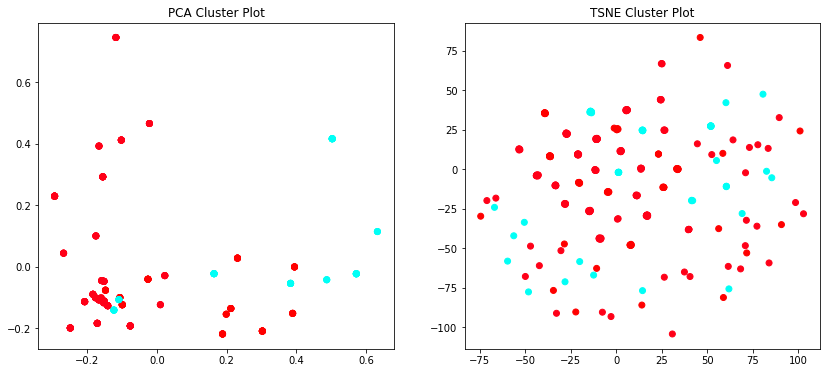

In [ ]:
plot_tsne_pca(vectors_TFIDF, clusters_TFIDF)

*2.3 Keywords Extraction*

Keyword extraction consists of going through the TF-IDF matrix row by row, and keeping the terms whose values fall within the interval defined by [q1,q3]. After that, you can proceed to manual filtering to end up with the words that really matter.

In [ ]:
df.columns

Index(['10am', '30am', '5th', '6pm', '9pm', 'add', 'ahead', 'amazing',
       'ambience', 'anytime',
       ...
       'visit', 'visiting', 'warm', 'wifi', 'win', 'winter', 'work', 'worker',
       'year', 'zulu'],
      dtype='object', length=212)

In [ ]:
l=  []
for i in range(len(Corpus)):
  aux = df.iloc[i].values.tolist()
  l+=aux

The length is equal to the length of the columns -in this case 212-... 

In [ ]:
len(l) == (len(Corpus)*212)

True

In [ ]:
l = [i for i in l if i != 0] #remove zeros from list

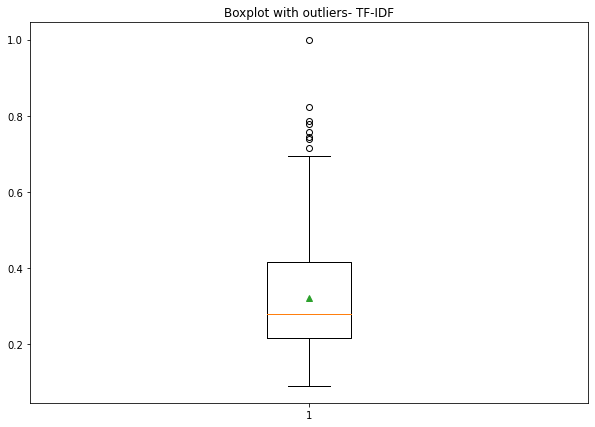

In [ ]:
#BoxPlot
fig = plt.figure(figsize =(10, 7))
# Creating plot
bp = plt.boxplot(l,showmeans=True) 
# show plot
plt.title("Boxplot with outliers- TF-IDF")
plt.show()

In [ ]:
q1_TFIDF = [round(min(item.get_ydata()), 1) for item in bp['boxes']]
q3_TFIDF = [round(max(item.get_ydata()), 1) for item in bp['boxes']]
print(f'Q1: {q1_TFIDF}\n'
      f'Q3: {q3_TFIDF}')  #q1:0.2 , q3:0.3

Q1: [0.2]
Q3: [0.4]


In [ ]:
'''
Each element from the row of the matrix which value is between q1 and q3 value, is 
added to the list
'''
positionsTFIDF =[]
for i in range(len(Corpus)):
  aux = df.iloc[i].values.tolist()
  for index, value in enumerate(aux):
      if (q1_TFIDF[0] < value < q3_TFIDF[0] ):
        positionsTFIDF.append(index)

In [ ]:
#remove duplicated values
positionsTFIDF = list(set(positionsTFIDF)) 
print(f"Number of unique keywords: {len(positionsTFIDF)}")

Number of unique keywords: 147


Here you can do manual filtering to end up with the words that are really important.



In [ ]:
#for p in positionsTFIDF:
#  print(df.columns[p])
#  print("---------------")

[**Return to index**](#index)

<a name="TextRank"></a>
# 3. TextRank

*3.1 Implementation*

After performing keyword extraction with the TF-IDF statistics-based method, we proceeded to perform keyword extraction using a graph-based approach.

The main idea is simply to decide the importance of the nodes that make up a graph. The importance of these will be adjudicated by means of a voting/recommendation system. 

In order to extract the keywords, the units to be compared in a ranking can be either lexical units or sequences existing in the input text. These components will form the vertices of the network.


The union of terms -through an edge- will be performed as long as the units belong to the same window of size N, being N included in the interval.

*3.1 Keywords Extraction*

In [48]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
import requests
stopwords_list = requests.get("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").content
stop_words = set(stopwords_list.decode().splitlines()) 

In [50]:
stop_words.add('starbucks')
#stop_words.add('csv pharmacy')
#stop_words.add('csv')
#stop_words.add('McDonalds')
#stop_words.add("McDonald's")

In [51]:
print('starbucks' in stop_words)
#print('csv pharmacy' in stop_words)
#print('csv' in stop_words)
#print('McDonalds' in stop_words)
#print("McDonald's" in stop_words)

True


In [52]:
'''
  Here you can change the business
'''
totalReviewsTextRank = FilterReviewsStarBucks

In [53]:
totalReviewsTextRank = removeEmptyReviews(totalReviewsTextRank)

In [54]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [55]:
'''
  INPUT: string of words
  OUTPUT: string of filtered words -based on the tags-
'''
def postagFilter(sentence):

  word_tokens = word_tokenize(sentence)
  aux = nltk.pos_tag(word_tokens)

  words_list=[]

  pos_tags = ['JJ','JJR','JJS','NN','NNS']

  for w in range(len(aux)):
    if (aux[w][1]) in pos_tags:
      words_list.append(aux[w][0])

  words_list = " ".join(words_list)  
  
  return str(words_list)

In [56]:
'''
  INPUT: string
  OUTPUT: preprocessed string
'''
def preprocessingTextRank(sentence):
  sentence = toLowerCase(sentence) 
  #Se prueba a filtrar los datos aqui
  sentence = postagFilter(sentence)
  sentence = removePunctuation(sentence)
  sentence = removeApostrophe(sentence)
  sentence = removeCharactersLengthOne(sentence)
  sentence = numberConvert(sentence)
  sentence = removeStopWords(sentence)
  #is it possible to use stemming
  sentence = lemmatization(sentence)
  sentence = removePunctuation(sentence)
  return sentence

In [57]:
for i in range(len(totalReviewsTextRank)):
  for s in range(len(totalReviewsTextRank[i])):
    preprocessedSentence = preprocessingTextRank(totalReviewsTextRank[i][s])
    totalReviewsTextRank[i][s]=str(preprocessedSentence)

In [58]:
totalReviewsTextRank = removeEmptyReviews(totalReviewsTextRank)

In [59]:
sentenceTextRank = [" ".join(x) for x in totalReviewsTextRank]

In [60]:
import spacy
from collections import OrderedDict

The tokens obtained up to this point become components of the generated graph(nodes).

In [61]:
'''
  INPUT: list of lists, which contains filtered words from each sentence in 
        the corpus that makes up the corpus

  OUTPUT: dictionary with all existing terms 
'''
def getTextRankVocabulary(sentences):
  vocabulary = OrderedDict()
  index = 0
  
  for s in sentences:
    for w in s:
      if w not in vocabulary:
        vocabulary[w] = index
        index += 1
        
  return vocabulary

In [62]:
'''
    INPUT: integer representing window size 
          list of lists with filtered words
    Salida: token pairs
 '''
def getPairsOfTokens(window_size, sentences):
  """Build token_pairs from windows in sentences"""
  pairsTokens = list()
  
  for s in sentences:
    for i, w in enumerate(s):
      for j in range(i+1, i+window_size):
        if j >= len(s):
          break
        pair = (w, s[j])
        if pair not in pairsTokens:
          pairsTokens.append(pair)

  return pairsTokens

In [63]:
'''
  INPUT: matrix a
  OUTPUT: symmetric Matrix
'''
def symmetricMatrix(a):
  return a + a.T - np.diag(a.diagonal())

In [64]:
'''
  INPUT: dictionary with all existing terms 
         pair of tokens
  Salida: normalized matrix
'''
def obtainMatrix(vocab, pairsTokens):
      
  #matrix creation
  vocab_size = len(vocab)
  m = np.zeros((vocab_size, vocab_size), dtype='float')
  for word1, word2 in pairsTokens:
    i, j = vocab[word1], vocab[word2]
    m[i][j] = 1 #value initialization
            
  #obtain symmetric matrix
  m = symmetricMatrix(m)
        
  #normalize matrix by columns
  norm = np.sum(m, axis=0)
  m_norm = np.divide(m, norm, where=norm!=0) 
        
  return m_norm

In [65]:
'''
  Entrada: dictionary (word,weight of word)
           integer K
  OUTPUT: list with the K keywords according to the weight of the word
'''
def obtainKKeywords(wordWeight,numberOfKeywords):
  KKeywords = []
  print(numberOfKeywords)
  #Sort dictionary 
  wordWeight = OrderedDict(sorted(wordWeight.items(), key=lambda t: t[1], reverse=True))

  for i, (k,v) in enumerate(wordWeight.items()):
    #KKeywords.append(str(k))
    if i > numberOfKeywords-1:
      break
    print(k + ' - ' + str(v))
    KKeywords.append(str(k))

  return KKeywords

In [66]:
#------------------Definition of parameters to be used in TextRank-----------------

#windows size
windows_size = 4
#damping coeficient 
d = 0.85 
#convergence threshold
convergenceThreshold = 1e-5
#number of iterations needed by the ranking algorithm
numberOfIterations = 20
#dictionary of words and weights
weightWordsNode = None 

In [67]:
'''
  INPUT: sentence
  OUTPUT: list of words that make up the sentence
'''
def transformSentenceFormat(sentence):

  word_tokens = word_tokenize(sentence)
  words_list=[]

  for w in word_tokens:
    words_list.append(w)
    
  return words_list

In [68]:
sentenceTextRankFilter = []
for s in sentenceTextRank:
  sentenceTextRankFilter.append(transformSentenceFormat(s))

In [69]:
vocabulary = getTextRankVocabulary(sentenceTextRankFilter) 

In [70]:
%%time
pairOfTokens = getPairsOfTokens(windows_size, sentenceTextRankFilter)

CPU times: user 14.4 ms, sys: 0 ns, total: 14.4 ms
Wall time: 15.4 ms


In [71]:
normalizedMatrix = obtainMatrix(vocabulary, pairOfTokens)

In [77]:
# Weight initialization
pr = np.array([1] * len(vocabulary))
        
# Iteration
previous_pr = 0

# Perform the process as many times as the number of iterations.
for iter in range(numberOfIterations):
  pr = (1-d) + d*np.dot(normalizedMatrix, pr)
  if abs(previous_pr - sum(pr)) < convergenceThreshold:
    break
  else:
    previous_pr = sum(pr)


# Obtain the weight for the word
weightWordsNode = dict()
for w, i in vocabulary.items():
    weightWordsNode[w] = pr[i]
        
weightWordsNode = weightWordsNode

In [78]:
KKeywordsTextRank= obtainKKeywords(weightWordsNode,10)

10
awesome - 4.280354289506298
day - 3.5085222243263168
central - 3.3716046128754806
baristas - 3.3291483512120346
location - 3.0464462813731474
staff - 3.02414140901208
great - 2.807098463431229
code - 2.483404258397601
open - 2.2400551628366308
love - 1.9062090794306705


*3.2 Application of word2vec to measure the similarity of the words obtained*

As a measure to establish a future comparison, an approach based on calculating the similarity of the k keywords obtained to each other was chosen.

To perform this task, the word2vec model was applied.

In [72]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
print('Imported Successfully!')

Imported Successfully!


In [74]:
import gensim.downloader as api

word_vectors = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [75]:
'''
  INPUT: k most similar words
  OUTPUT: List with the similarity obtained for each word with the rest of 
          the word
'''
def calculateSimilarities(KTextRankKeywords):

  similarities = []

  for k in range(len(KTextRankKeywords)):
    #If it is initial element
    if(k==0):
      for j in range(1,10):
        V1=  word_vectors[str(KTextRankKeywords[k])]
        V2 = word_vectors[str(KTextRankKeywords[j])]
        similarities.append(cosine_similarity([V1],[V2])[0][0])
    #If it is the intermediate element
    elif(0 < k < 9):
      #lower half
      for j in range(0,k):
        V1=  word_vectors[str(KTextRankKeywords[k])]
        V2 = word_vectors[str(KTextRankKeywords[j])]
        similarities.append(cosine_similarity([V1],[V2])[0][0])
    #upper half
      for j in range(k+1,10):
        V1=  word_vectors[str(KTextRankKeywords[k])]
        V2 = word_vectors[str(KTextRankKeywords[j])]
        similarities.append(cosine_similarity([V1],[V2])[0][0])
    #If it is a superior element
    elif(k == 9):
      for j in range(0,9):
        V1=  word_vectors[str(KTextRankKeywords[k])]
        V2 = word_vectors[str(KTextRankKeywords[j])]
        similarities.append(cosine_similarity([V1],[V2])[0][0])
  
  return similarities

In [79]:
similarities = calculateSimilarities(KKeywordsTextRank)

In [80]:
print(f"The average similarity of the words is {np.array(similarities).mean()}")

The average similarity of the words is 0.10774349421262741


[**Return to index**](#index)